In [4]:
import numpy as np
import matplotlib.pyplot as plt
from analysis_tes import *

In [5]:
n_sims = 10_000 #Number of phonons, proportional to energy

d1 = 2 # cm 
d2 = 2 # cm
z = 0.04 # cm

#By dividing by the dimensions we see the box as +- 1/2 on all sides
v_fast = 1.1 / (z) #1/mus double check this
v_slow = 0.6 / (d1) #1/mus double check this

w = (0.1/2/d1) #TES dimension is 1 x 1 mm^2 = 0.1 x 0.1 cm^2 express it as a fraction of the linear box dimensions /2 for radius

p_abs = 0.0064  #probability of being absorbed => generalize to array using np random choice non 1D shape (check documentation)

dt = 0.5 #time step of simulation (mus)

In [3]:
#Active
wall_top = np.array((0, 0, 1/2))
wall_bottom = np.array((0, 0, -1/2))
wall_left = np.array((0, -1/2, 0))
wall_right = np.array((0, 1/2, 0))
wall_up = np.array((1/2, 0, 0))
wall_down = np.array((-1/2, 0, 0))

normal_top = np.array((0, 0, -1))
normal_bottom = np.array((0, 0, 1))
normal_left = np.array((0, 1, 0))
normal_right = np.array((0, -1, 0))
normal_up = np.array((-1, 0, 0))
normal_down = np.array((1, 0, 0))

TES_1_position = np.array( (1/4, 1/4, 1/2) )
TES_2_position = np.array( (1/4, -1/4, 1/2) )

wall_positions = np.array([wall_top, wall_bottom, wall_left, wall_right, wall_up, wall_down])
wall_normals = np.array([normal_top, normal_bottom, normal_left, normal_right, normal_up, normal_down])
detector_positions = np.array(([TES_1_position, TES_2_position]))
detector_normals = np.array([normal_top, normal_top])

detector_labels = ["TES_1", "TES_2"]

crystal_geometry = Geometry_TES( wall_positions, detector_positions, wall_normals, detector_normals, detector_labels, w )

In [46]:
from itertools import product

n_sims = 10_000

starting_position = np.array((1/4, -1/4, -1/2 + 0.06))
charges_arr = []

analysis = Analysis_TES(v_fast, v_slow, p_abs, crystal_geometry)
analysis.n_sims = n_sims

n = 10

dx = np.linspace(-1/2 + 0.05, 1/2 - 0.05, n)
dy = np.linspace(-1/2 + 0.05, 1/2 - 0.05, n)
dz = [1/2 - 0.05, -1/2 + 0.05] #top and bot events

initial_positions = np.array(list(product(dx, dy, dz)))

simulation_id = 0
for pos_in in initial_positions:
    simulation_id += 1
    if simulation_id%10 == 0:
        print(f"Progress {simulation_id/n**2/2*100:.0f}")
    _, absorbed_phonons_1 = analysis.simulation(pos_in)
    hist_phonons_1, edges_ss =  analysis.build_hist(absorbed_phonons_1) #Treat this as a baseline
    charges = np.sum(hist_phonons_1, 1)
    charges_arr.append(charges)

charges_arr = np.array(charges_arr)

c:\Users\ludov\OneDrive\Desktop\CRESST\PhononSimulation\Two_Disk_Intersection\analysis_tes.py:6: RuntimeWarning: divide by zero encountered in divide
  t = (np.einsum('ik,ijk->ji', n_box, -y0+p0[:, None])/(dir@n_box.T) ).T
c:\Users\ludov\OneDrive\Desktop\CRESST\PhononSimulation\Two_Disk_Intersection\analysis_tes.py:15: RuntimeWarning: invalid value encountered in multiply
  return (p_0 + t * dir)


Progress 5
Progress 10
Progress 15
Progress 20
Progress 25
Progress 30
Progress 35
Progress 40
Progress 45
Progress 50
Progress 55
Progress 60
Progress 65
Progress 70
Progress 75
Progress 80
Progress 85
Progress 90
Progress 95
Progress 100


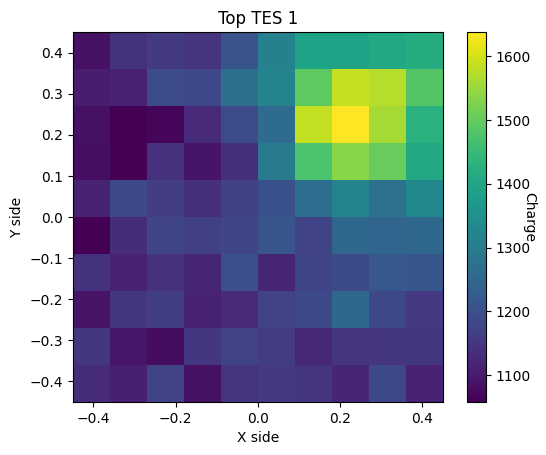

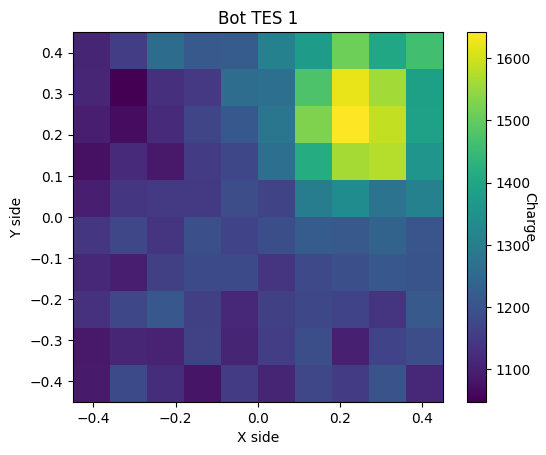

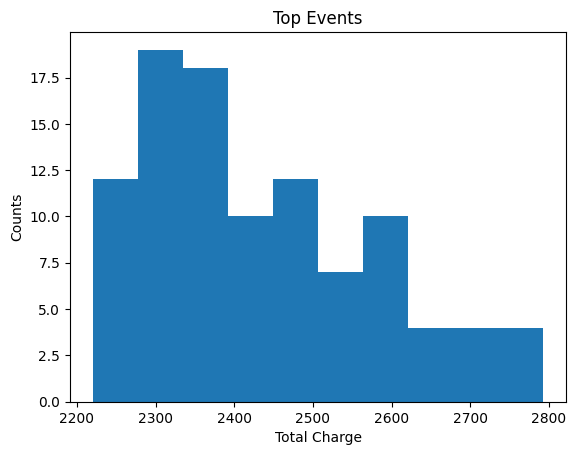

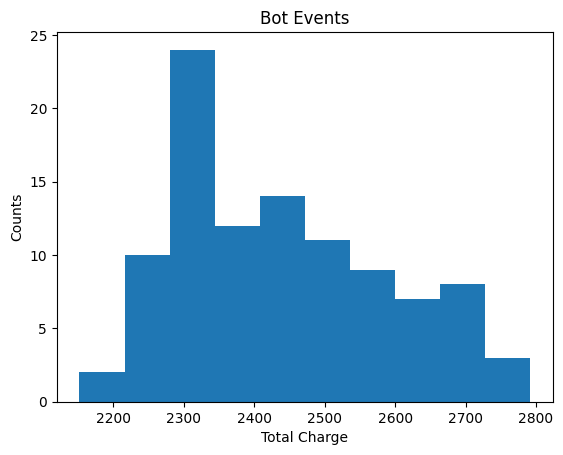

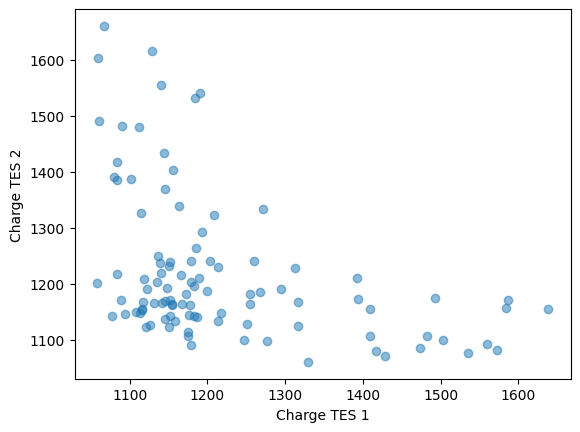

In [58]:
charges_xyz = charges_arr.reshape( (len(dx), len(dy), len(dz), 2) )

plt.imshow( charges_xyz[:,:,0,0], origin='lower', extent=[dx[0], dx[-1], dy[0], dy[-1]] )
plt.title("Top TES 1")
cbar = plt.colorbar()
cbar.set_label("Charge", rotation=270)
plt.xlabel("X side")
plt.ylabel("Y side")
plt.show()

plt.imshow( charges_xyz[:,:,1,0], origin='lower', extent=[dx[0], dx[-1], dy[0], dy[-1]] )
plt.title("Bot TES 1")
cbar = plt.colorbar()
cbar.set_label("Charge", rotation=270)
plt.xlabel("X side")
plt.ylabel("Y side")
plt.show()

#sum charge
charges_xyz_sum = np.sum(charges_xyz, 3)
plt.hist( charges_xyz_sum[:,:,0].flatten(), bins=n)
plt.xlabel("Total Charge")
plt.ylabel("Counts")
plt.title("Top Events")
plt.show()

plt.hist( charges_xyz_sum[:,:,1].flatten(), bins=n)
plt.xlabel("Total Charge")
plt.ylabel("Counts")
plt.title("Bot Events")
plt.show()

#scatter plot of charges
# plt.scatter( charges_xyz[:,:,0,0].flatten(), charges_xyz[:,:,0,1].flatten(), alpha=0.5)
# plt.xlabel("Charge TES 1")
# plt.ylabel("Charge TES 2")
# plt.savefig(f"banana{n}.pdf")
# plt.show()

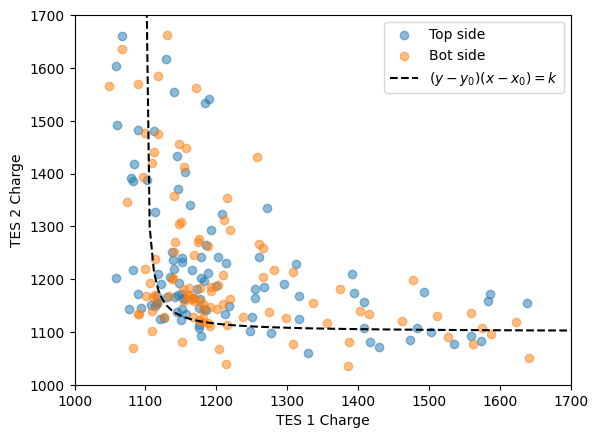

In [84]:

#scatter plot of charges
charges_linear = np.linspace( 1100, 1700, 100 )

plt.scatter( charges_xyz[:,:,0,0].flatten(), charges_xyz[:,:,0,1].flatten(), alpha=0.5, label="Top side")
plt.scatter( charges_xyz[:,:,1,0].flatten(), charges_xyz[:,:,1,1].flatten(), alpha=0.5, label="Bot side")
plt.plot( charges_linear, 1100 + 1600 / (charges_linear - 1098), 'k--', label="$(y-y_0)(x-x_0)=k$")

plt.xlabel("TES 1 Charge")
plt.ylabel("TES 2 Charge")
plt.legend()
plt.ylim(1000, 1700)
plt.xlim(1000, 1700)
plt.savefig(f"banana{n}_t_b.pdf")
plt.show()

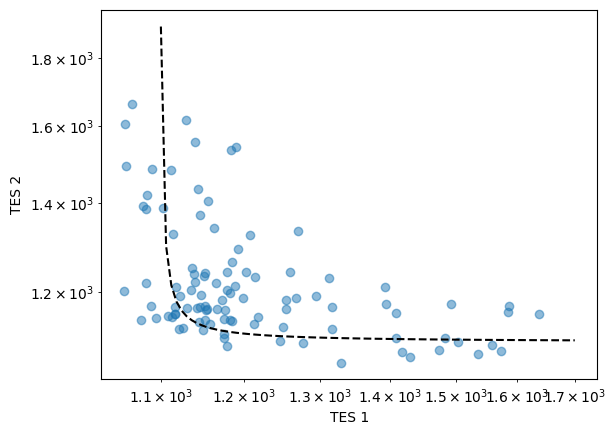

In [81]:
#log scatter plot of charges
plt.scatter( charges_xyz[:,:,0,0].flatten(), charges_xyz[:,:,0,1].flatten(), alpha=0.5)
plt.plot( charges_linear, 1100 + 1600 / (charges_linear - 1098), 'k--', label="$(y-y_0)(x-x_0)=k$")
plt.xlabel("TES 1")
plt.ylabel("TES 2")
plt.yscale('log')
plt.xscale('log')
plt.show()

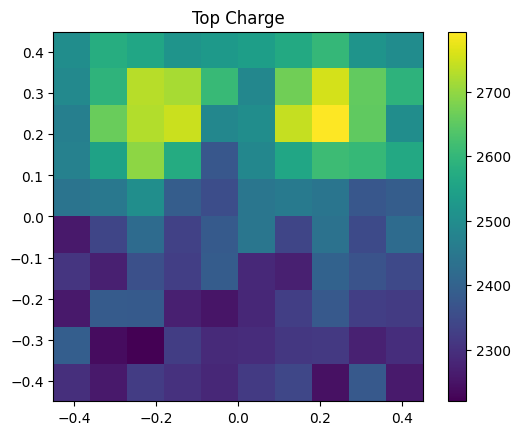

In [55]:
plt.imshow( charges_xyz[:,:,0].sum(2), origin='lower', extent=[dx[0], dx[-1], dy[0], dy[-1]] )
plt.title("Top Charge")
plt.colorbar()
plt.show()

np.save(f"charges_xyz_{n}.npy", charges_xyz)